In [1]:
import os
import numpy as np
import torch
from torchvision import datasets, models, transforms
import torchvision
from torchvision.datasets import ImageFolder
from torch.utils.data import Subset

In [2]:
def mean_std(loader):
  images, _ = next(iter(loader))
  # shape of images = [b,c,w,h]
  mean, std = images.mean([0,2,3]), images.std([0,2,3])
  return mean, std

In [3]:
datasetARIA = ImageFolder("ARIA", transforms.Compose([transforms.Resize((256, 256)),transforms.ToTensor(),transforms.Normalize([0.5423, 0.1981, 0.0478], [0.3129, 0.1735, 0.0897])]))
idxARIA = [i for i in range(len(datasetARIA)) if datasetARIA.imgs[i][1] in [1, 4, 7]]
subsetARIA = Subset(datasetARIA, idxARIA)

datasetHRF = ImageFolder("HRF", transforms.Compose([transforms.Resize((256, 256)),transforms.ToTensor(),transforms.Normalize([0.6208, 0.2005, 0.1026], [0.2934, 0.1111, 0.0604])]))
idxHRF = [i for i in range(len(datasetHRF)) if datasetHRF.imgs[i][1] in [0]]
subsetHRF = Subset(datasetHRF, idxHRF)

datasetFIVES = ImageFolder("FIVES/train", transforms.Compose([transforms.Resize((256, 256)),transforms.ToTensor(),transforms.Normalize([0.3963, 0.1867, 0.0720], [0.2677, 0.1439, 0.0645])]))
idxFIVES = [i for i in range(len(datasetFIVES)) if datasetFIVES.imgs[i][1] in [1]]
subsetFIVES = Subset(datasetFIVES, idxFIVES)

dataset = ImageFolder("C:/Users/micha/OneDrive - SGH/licencjat fizyka/Retinopatia/densenet/data/data_m/train", transforms.Compose([transforms.Resize((256, 256)),transforms.ToTensor(),transforms.Normalize([0.3998, 0.1676, 0.0636], [0.2762, 0.1356, 0.0666])]))

datasetprep = ImageFolder("C:/Users/micha/OneDrive - SGH/licencjat fizyka/Retinopatia/densenet/data/data_m_prep/train", transforms.Compose([transforms.Resize((256, 256)),transforms.ToTensor(),transforms.Normalize([0.5023, 0.5017, 0.5019], [0.1245, 0.0934, 0.0581])]))

In [4]:
image_data_loaderARIA = torch.utils.data.DataLoader(
    subsetARIA,
    batch_size=len(subsetARIA),
    shuffle=False,
    num_workers=0)

image_data_loaderHRF = torch.utils.data.DataLoader(
    subsetHRF,
    batch_size=len(subsetHRF),
    shuffle=False,
    num_workers=0)

image_data_loaderFIVES = torch.utils.data.DataLoader(
    subsetFIVES,
    batch_size=len(subsetFIVES),
    shuffle=False,
    num_workers=0)

image_data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=len(dataset),
    shuffle=False,
    num_workers=0)

image_data_loaderprep = torch.utils.data.DataLoader(
    datasetprep,
    batch_size=len(datasetprep),
    shuffle=False,
    num_workers=0)

In [5]:
mean, std = mean_std(image_data_loaderARIA)
print("ARIA: \n", mean, std)

mean, std = mean_std(image_data_loaderHRF)
print("HRF: \n", mean, std)

mean, std = mean_std(image_data_loaderFIVES)
print("fives: \n", mean, std)

mean, std = mean_std(image_data_loader)
print("raw: \n", mean, std)

mean, std = mean_std(image_data_loaderprep)
print("prep: \n", mean, std)

ARIA: 
 tensor([-9.4825e-05, -1.3554e-04, -5.5553e-04]) tensor([1.0001, 1.0001, 1.0002])
HRF: 
 tensor([ 3.8135e-05,  3.6254e-04, -1.1682e-04]) tensor([0.9999, 1.0000, 1.0005])
fives: 
 tensor([-0.2178, -0.2349, -0.1262]) tensor([0.8990, 0.8586, 0.8470])
raw: 
 tensor([ 0.2985,  0.2390, -0.2118]) tensor([1.1895, 1.3017, 1.0911])
prep: 
 tensor([0.0040, 0.0018, 0.0041]) tensor([1.0400, 1.0528, 0.8447])


In [6]:
import matplotlib.pyplot as plt

def imgshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    # mean = np.array([0.485, 0.456, 0.406])
    # std = np.array([0.229, 0.224, 0.225])
    # inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.axis("off")
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

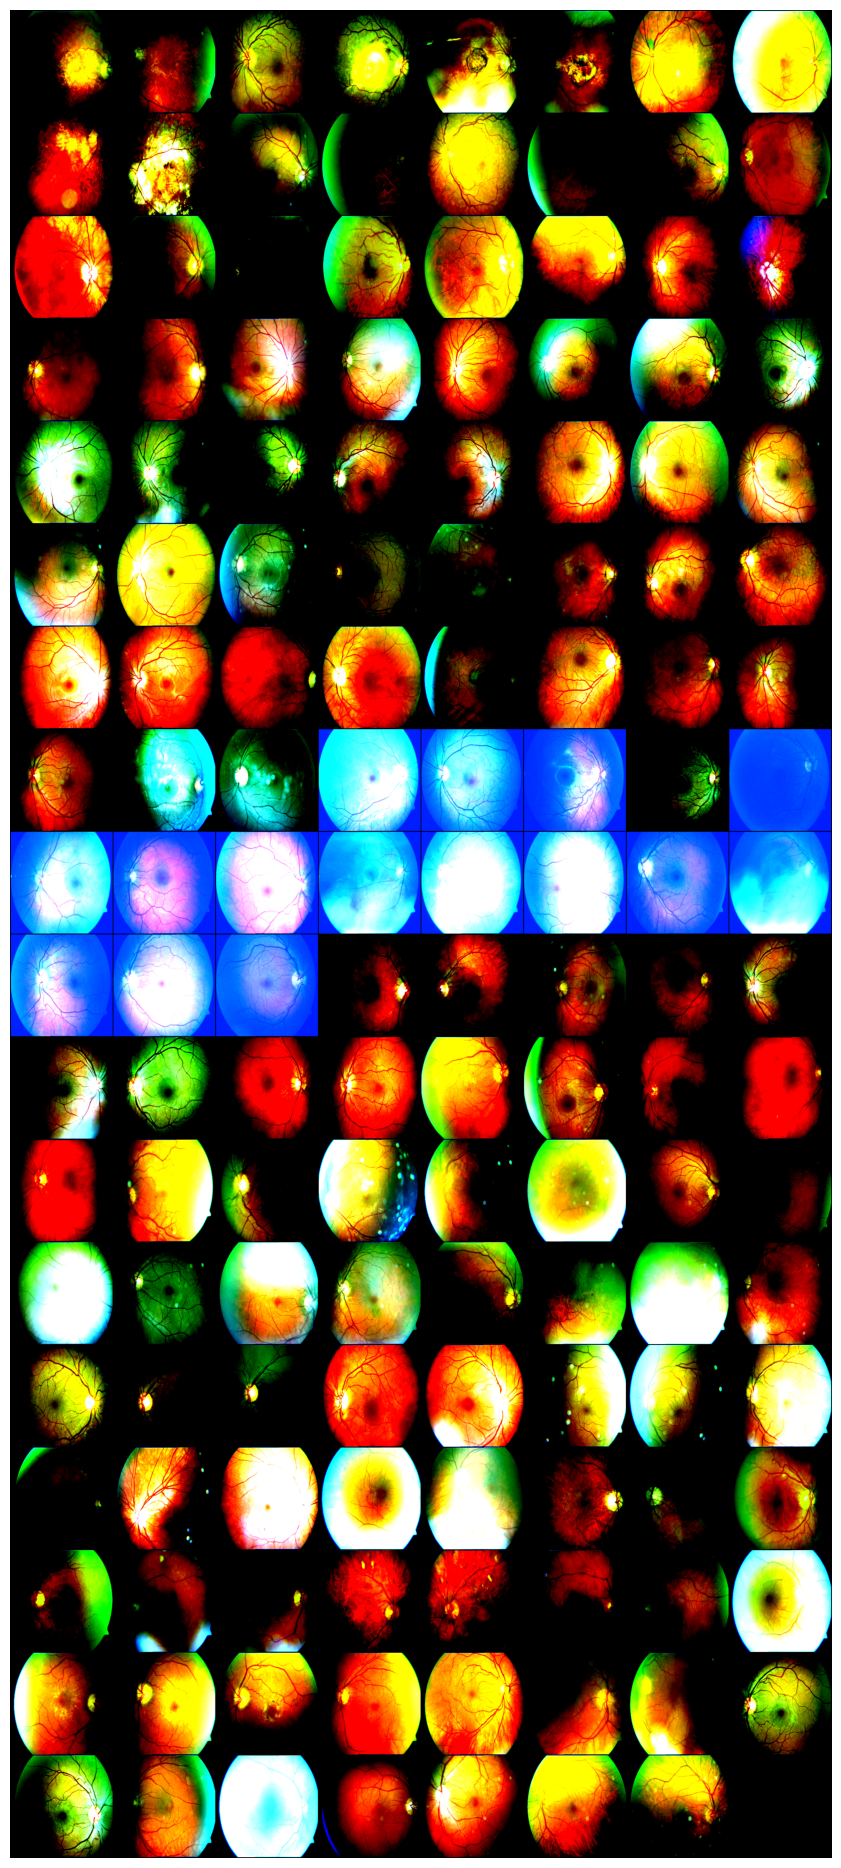

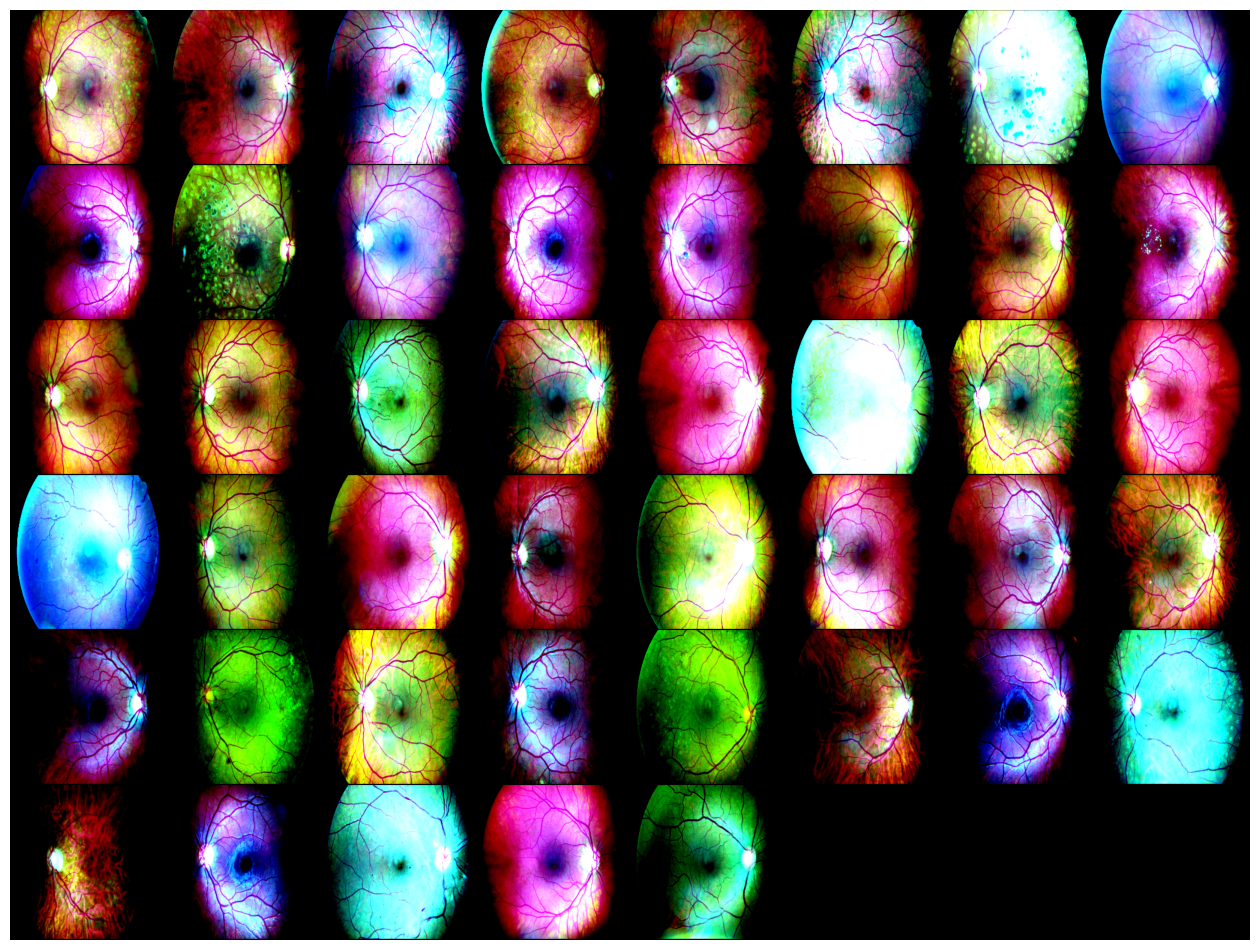

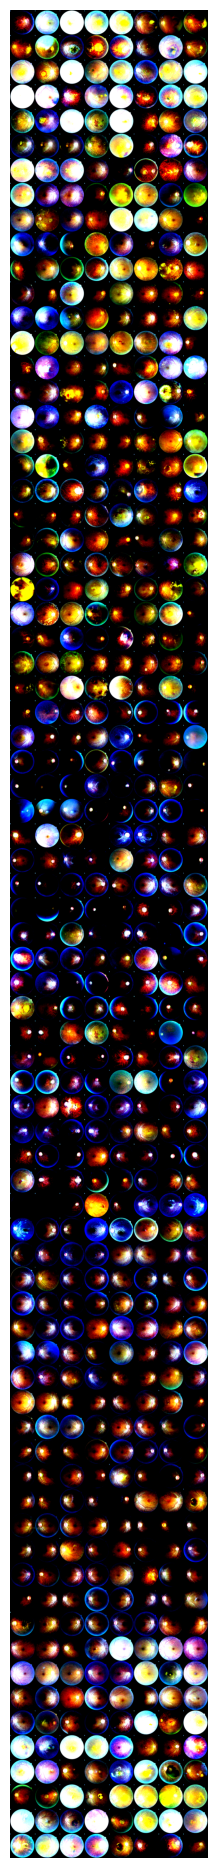

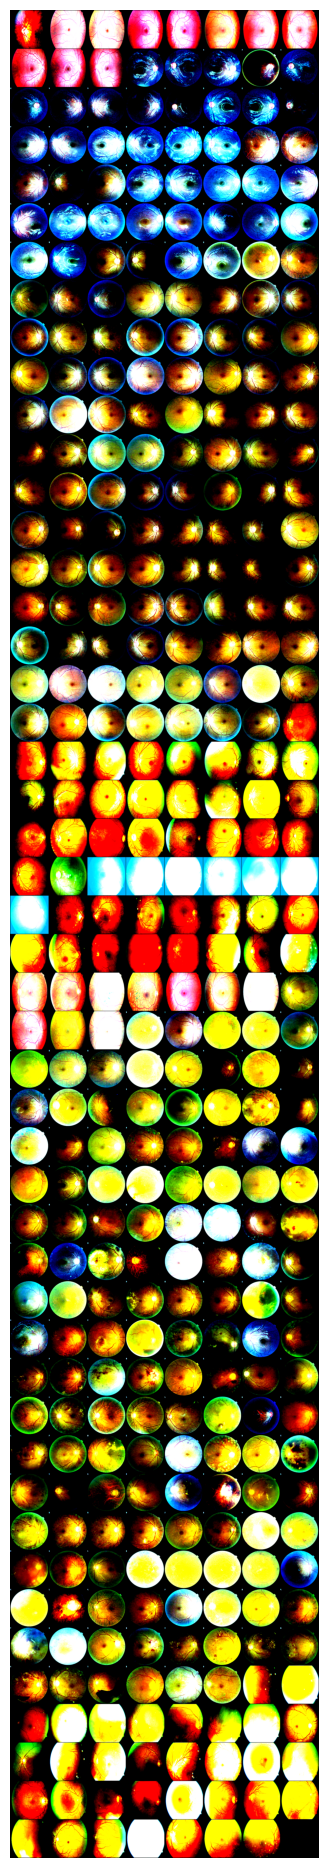

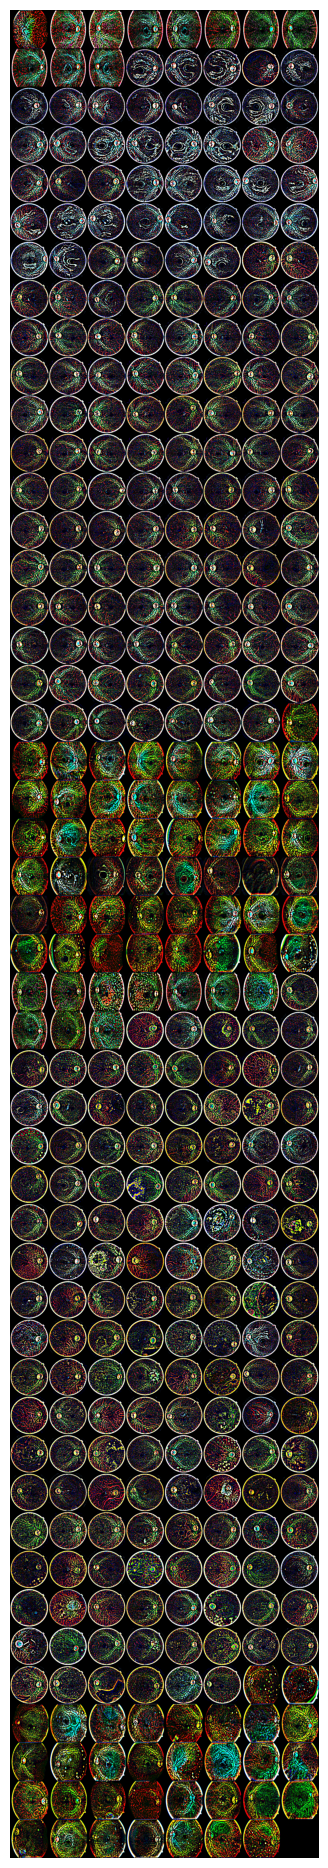

In [7]:
samples, labels = next(iter(image_data_loaderARIA))
plt.figure(figsize=(16,24))
grid_imgs = torchvision.utils.make_grid(samples)
imgshow(grid_imgs)

samples, labels = next(iter(image_data_loaderHRF))
plt.figure(figsize=(16,24))
grid_imgs = torchvision.utils.make_grid(samples)
imgshow(grid_imgs)

samples, labels = next(iter(image_data_loaderFIVES))
plt.figure(figsize=(16,24))
grid_imgs = torchvision.utils.make_grid(samples)
imgshow(grid_imgs)

samples, labels = next(iter(image_data_loader))
plt.figure(figsize=(16,24))
grid_imgs = torchvision.utils.make_grid(samples)
imgshow(grid_imgs)

samples, labels = next(iter(image_data_loaderprep))
plt.figure(figsize=(16,24))
grid_imgs = torchvision.utils.make_grid(samples)
imgshow(grid_imgs)

In [8]:
datasetARIA = ImageFolder("ARIA", transforms.Compose([transforms.ToTensor()]))
idxARIA = [i for i in range(len(datasetARIA)) if datasetARIA.imgs[i][1] in [1, 4, 7]]
subsetARIA = Subset(datasetARIA, idxARIA)

datasetHRF = ImageFolder("HRF", transforms.Compose([transforms.ToTensor()]))
idxHRF = [i for i in range(len(datasetHRF)) if datasetHRF.imgs[i][1] in [0]]
subsetHRF = Subset(datasetHRF, idxHRF)

datasetFIVES = ImageFolder("FIVES/train", transforms.Compose([transforms.ToTensor()]))
idxFIVES = [i for i in range(len(datasetFIVES)) if datasetFIVES.imgs[i][1] in [1]]
subsetFIVES = Subset(datasetFIVES, idxFIVES)

image_data_loaderARIA = torch.utils.data.DataLoader(
    subsetARIA,
    batch_size=1,
    shuffle=False,
    num_workers=0)

image_data_loaderHRF = torch.utils.data.DataLoader(
    subsetHRF,
    batch_size=1,
    shuffle=False,
    num_workers=0)

image_data_loaderFIVES = torch.utils.data.DataLoader(
    subsetFIVES,
    batch_size=1,
    shuffle=False,
    num_workers=0)

In [14]:
i, _ = next(iter(image_data_loaderARIA))
im, _ = next(iter(image_data_loaderHRF))
img, _ = next(iter(image_data_loaderFIVES))
print(i.shape)
print(im.shape)
print(img.shape)

torch.Size([1, 3, 576, 768])
torch.Size([1, 3, 2336, 3504])
torch.Size([1, 3, 2048, 2048])
